In [ ]:
!pip install imbalanced-learn

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving geometric_features.csv to geometric_features (3).csv


In [ ]:
import pandas as pd

df = pd.read_csv("geometric_features.csv")
df.head()

,video,frame,label,ear,mar,circularity,moe
0,1-FemaleNoGlasses.avi,5,0,0.3114,0.2601,0.4695,0.8351
1,1-FemaleNoGlasses.avi,10,0,0.3164,0.2472,0.4777,0.7813
2,1-FemaleNoGlasses.avi,15,0,0.3230,0.2687,0.4788,0.8319
3,1-FemaleNoGlasses.avi,20,0,0.3165,0.2525,0.4765,0.7977
4,1-FemaleNoGlasses.avi,25,0,0.3432,0.2739,0.5602,0.7980


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36524 entries, 0 to 36523
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   video        36524 non-null  object 
 1   frame        36524 non-null  int64  
 2   label        36524 non-null  int64  
 3   ear          36524 non-null  float64
 4   mar          36524 non-null  float64
 5   circularity  36524 non-null  float64
 6   moe          36524 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.0+ MB
None


In [ ]:
df.isnull().sum()

,0
video,0
frame,0
label,0
ear,0
mar,0
circularity,0
moe,0


In [ ]:
df.describe()

,frame,label,ear,mar,circularity,moe
count,36524.000000,36524.000000,36524.000000,36524.000000,36524.000000,36524.000000
mean,398.460601,0.248713,0.302149,0.117389,0.468653,0.444803
std,264.153981,0.432273,0.075960,0.118187,0.085033,0.540750
min,5.000000,0.000000,0.018900,0.000000,0.148400,0.000000
25%,180.000000,0.000000,0.257700,0.030100,0.415300,0.097800
50%,370.000000,0.000000,0.306000,0.075000,0.471300,0.253550
75%,570.000000,0.000000,0.352200,0.177200,0.524100,0.619000
max,1510.000000,1.000000,0.593200,1.037200,0.807500,15.393400


In [ ]:
df['label'].value_counts()

,count
label,
0,27440
1,9084


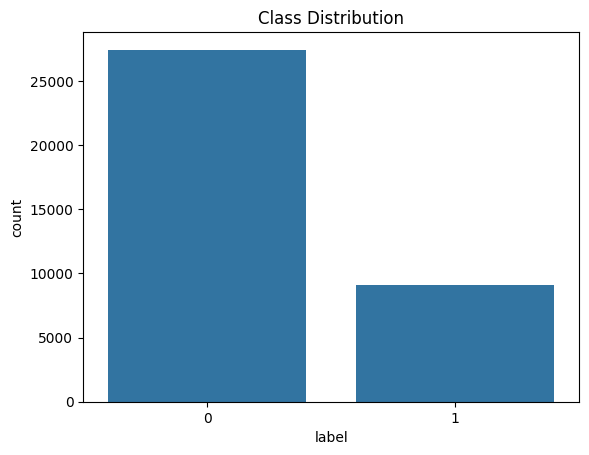

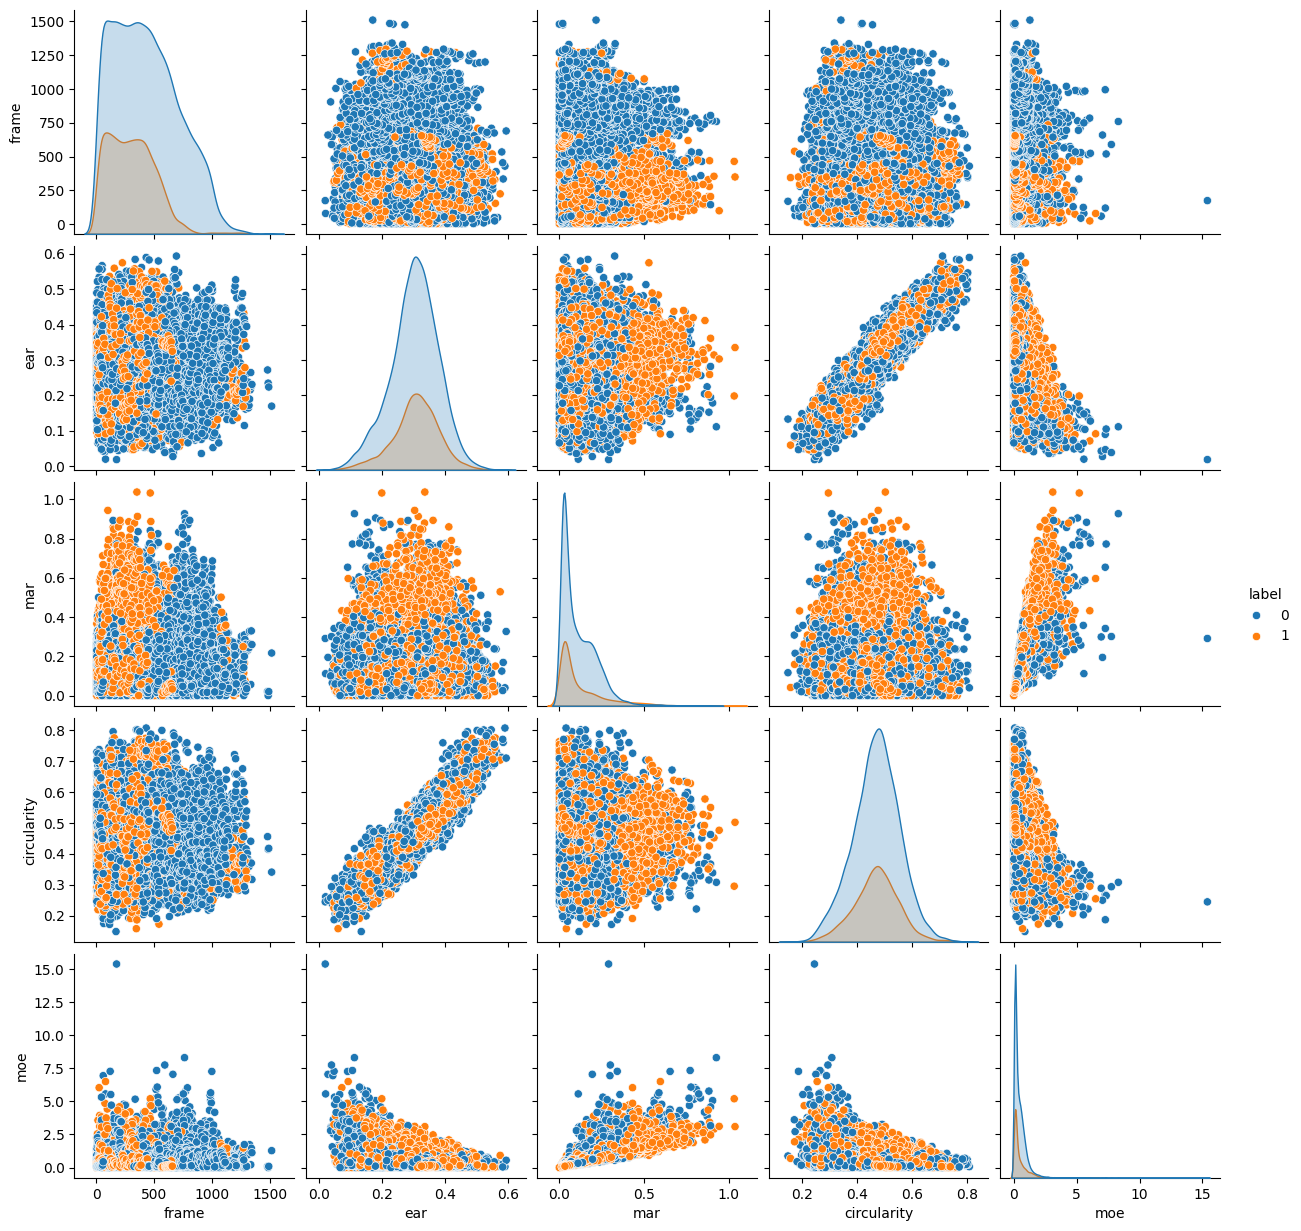

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['label'])
plt.title("Class Distribution")
plt.show()

sns.pairplot(df, hue='label')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Select features
X = df[['ear', 'mar', 'circularity', 'moe']]
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate_model(name, model, X_test, y_test):
    preds = model.predict(X_test)

    print(f"\n==== {name} ====")
    print("Accuracy :", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall   :", recall_score(y_test, preds))
    print("F1 Score :", f1_score(y_test, preds))
    print("\nConfusion Matrix:\n", confusion_matrix(y_test, preds))

    return f1_score(y_test, preds)   # used for best model selection

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_scaled, y_train)

svm_f1 = evaluate_model("SVM", svm_model, X_test_scaled, y_test)


==== SVM ====
Accuracy : 0.760164271047228
Precision: 0.7070063694267515
Recall   : 0.06108970831040176
F1 Score : 0.11246200607902736

Confusion Matrix:
 [[5442   46]
 [1706  111]]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train_scaled, y_train)

rf_f1 = evaluate_model("Random Forest", rf_model, X_test_scaled, y_test)


==== Random Forest ====
Accuracy : 0.7336071184120465
Precision: 0.40030911901081917
Recall   : 0.14254265272427077
F1 Score : 0.21022727272727273

Confusion Matrix:
 [[5100  388]
 [1558  259]]


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

knn_f1 = evaluate_model("KNN", knn_model, X_test_scaled, y_test)


==== KNN ====
Accuracy : 0.7162217659137577
Precision: 0.35487528344671204
Recall   : 0.17226197028068244
F1 Score : 0.23193775472397185

Confusion Matrix:
 [[4919  569]
 [1504  313]]


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

xgb_f1 = evaluate_model("XGBoost", xgb_model, X_test_scaled, y_test)


==== XGBoost ====
Accuracy : 0.7524982888432581
Precision: 0.5147540983606558
Recall   : 0.0864061640066043
F1 Score : 0.14797360980207352

Confusion Matrix:
 [[5340  148]
 [1660  157]]


In [ ]:
scores = {
    "SVM": svm_f1,
    "RandomForest": rf_f1,
    "KNN": knn_f1,
    "XGBoost": xgb_f1
}

best_model_name = max(scores, key=scores.get)
best_score = scores[best_model_name]

print("\nBEST MODEL:", best_model_name)
print("BEST F1 Score:", best_score)


BEST MODEL: KNN
BEST F1 Score: 0.23193775472397185


In [ ]:
import joblib

if best_model_name == "SVM":
    best_model = svm_model
elif best_model_name == "RandomForest":
    best_model = rf_model
elif best_model_name == "KNN":
    best_model = knn_model
else:
    best_model = xgb_model

joblib.dump(best_model, "best_drowsiness_model.pkl")
joblib.dump(scaler, "feature_scaler.pkl")

print("Model saved as best_drowsiness_model.pkl")
print("Scaler saved as feature_scaler.pkl")

Model saved as best_drowsiness_model.pkl
Scaler saved as feature_scaler.pkl


In [ ]:
!pip install opencv-python dlib joblib


In [ ]:
import joblib
import numpy as np

model = joblib.load("best_drowsiness_model.pkl")
scaler = joblib.load("feature_scaler.pkl")
print("Model & Scaler Loaded!")


Model & Scaler Loaded!


Upload an image:


Saving test2.jpg to test2.jpg
Loaded model: best_drowsiness_model.pkl
Loaded scaler: feature_scaler.pkl


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


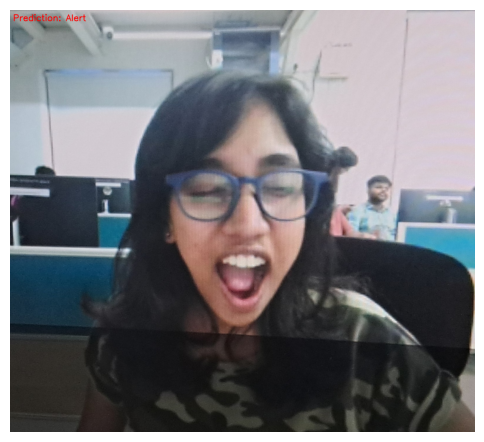

EAR: 0.2170957105350073
MAR: 0.5974004131791757
Circularity: 0.001933414543080642
MOE: 2.7517709121753073
Prediction: Alert


In [ ]:
# INSTALLATION
!pip install mediapipe==0.10.21 opencv-python --quiet

# IMPORTS
import cv2
import mediapipe as mp
import numpy as np
import joblib
from google.colab import files
import os
import matplotlib.pyplot as plt

# Upload image
print("Upload an image:")
uploaded = files.upload()
img_path = list(uploaded.keys())[0]

# Load model and scaler
model_paths = ["best_drowsiness_model.pkl", "/mnt/data/best_drowsiness_model.pkl"]
scaler_paths = ["feature_scaler.pkl", "/mnt/data/feature_scaler.pkl"]

model_path = next((p for p in model_paths if os.path.exists(p)), None)
scaler_path = next((p for p in scaler_paths if os.path.exists(p)), None)

if model_path is None:
    raise FileNotFoundError("best_drowsiness_model.pkl not found. Upload it first.")

model = joblib.load(model_path)
print("Loaded model:", model_path)

scaler = None
if scaler_path:
    scaler = joblib.load(scaler_path)
    print("Loaded scaler:", scaler_path)
else:
    print("Scaler not found. Using raw features.")

# GEOMETRIC FUNCTIONS
def euclid(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def eye_aspect_ratio(pts):
    A = euclid(pts[1], pts[5])
    B = euclid(pts[2], pts[4])
    C = euclid(pts[0], pts[3])
    if C == 0: return 0
    return (A + B) / (2 * C)

def mouth_aspect_ratio(left, right, top, bottom):
    hor = euclid(left, right)
    ver = euclid(top, bottom)
    return ver / hor if hor != 0 else 0

def circularity(pts):
    pts = np.array(pts, dtype=np.int32)
    area = cv2.contourArea(pts)
    peri = cv2.arcLength(pts, True)
    return (4 * np.pi * area / (peri * peri)) if peri != 0 else 0

# MEDIAPIPE SETUP
mp_face = mp.solutions.face_mesh
face_mesh = mp_face.FaceMesh(static_image_mode=True, max_num_faces=1)

# Load image
img_bgr = cv2.imread(img_path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
h, w, _ = img_rgb.shape

results = face_mesh.process(img_rgb)
if not results.multi_face_landmarks:
    raise Exception("No face detected in the image.")

landmarks = results.multi_face_landmarks[0].landmark
pts = [(int(p.x * w), int(p.y * h)) for p in landmarks]

# Indices
LEFT = [33, 160, 158, 133, 153, 144]
RIGHT = [263, 387, 385, 362, 380, 373]

MOUTH = {
    "left": 61,
    "right": 291,
    "top": 13,
    "bottom": 14
}

left_eye = [pts[i] for i in LEFT]
right_eye = [pts[i] for i in RIGHT]

ear = (eye_aspect_ratio(left_eye) + eye_aspect_ratio(right_eye)) / 2
mar = mouth_aspect_ratio(pts[MOUTH["left"]], pts[MOUTH["right"]], pts[MOUTH["top"]], pts[MOUTH["bottom"]])
circ = circularity(left_eye + right_eye)
moe = mar / (ear + 1e-6)

# Feature vector
X = np.array([[ear, mar, circ, moe]])
if scaler:
    X = scaler.transform(X)

pred = model.predict(X)[0]
label = "Drowsy" if pred == 1 else "Alert"

# DISPLAY
cv2.putText(img_bgr, f"Prediction: {label}", (10, 40),
            cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

plt.figure(figsize=(6,6))
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

print("EAR:", ear)
print("MAR:", mar)
print("Circularity:", circ)
print("MOE:", moe)
print("Prediction:", label)
